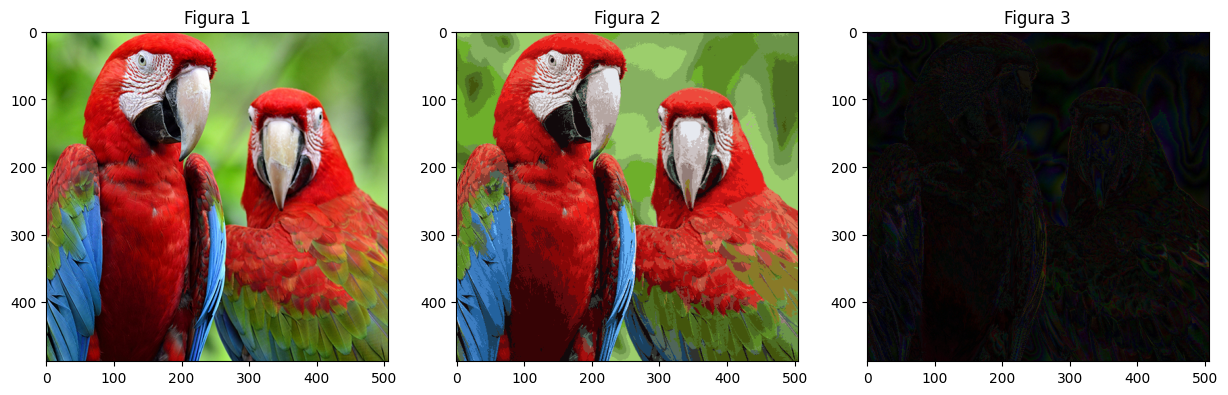

In [17]:
# A figura 1 representa a imagem original. A figura dois representa a imagem clusterisada por um KMeans com 3 clusters.
# o que esta plottado na figrura 2 é o centroide de cada cluster por cluster definido.
# A figura 3 representa a diferença entre a imagem original e a imagem clusterizada.
# Desse modo, ela trás uma ideia da distância de cada pixel da imagem original para o centroide do cluster que ele pertence.
# A figura 3 é uma forma de visualizar o erro da clusterização. Quanto mais próximo de 0, melhor a clusterização.

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
from tqdm import tqdm
import os

parameter_list = [3, 10, 30]

def function_1(img, parameter):
    temp = np.reshape(img, (img.shape[0] * img.shape[1], 3))
    model = KMeans(n_clusters=parameter, random_state=0, n_init=1).fit(temp)

    output = model.cluster_centers_[model.labels_]
    output = np.reshape(output, (img.shape[0], img.shape[1], 3))
    return output


imagem = mpimg.imread("araras.png")
output = function_1(imagem, 30)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 15))

ax1.imshow(imagem)
ax1.set_title("Figura 1")

ax2.imshow(output)
ax2.set_title("Figura 2")

ax3.imshow(np.abs(imagem - output))
ax3.set_title("Figura 3")

plt.show()

In [ ]:
# B)
# O número de bits por pixel necessário em função do número de clusters é dado por:
# bits = log2(n_clusters)
# onde 3 é o número de canais de cor da imagem.
# Afinal, não buscamos representar uma intensidade com 8 bits, mas sim diferenciar cada pixel entre si baseado no cluster que ele pertence.
# Assim tomamos o menor numero de bits necessarios para representar a qual cluster um pixel pertence.

In [6]:
parameter_interval = np.array(range(2, 50, 5))

for i in parameter_interval:
    image = mpimg.imread("araras.png")
    tmp = function_1(image, i)
    plt.imsave(f"imagem_{i}.png", tmp)

sizes = []
original_size = os.path.getsize("araras.png")

for i in parameter_interval:
    file_size = os.path.getsize(f"imagem_{i}.png") / original_size
    sizes.append(file_size)

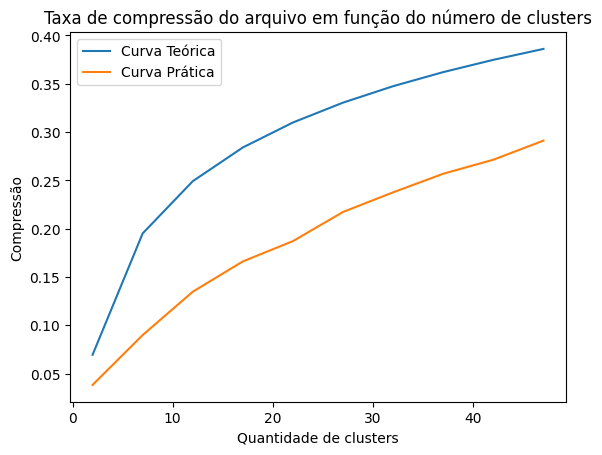

In [11]:
# C)

from math import log

IMG_PIXELS = 506 * 488
BITS_TO_BYTES = 8

# Curva teorica
plt.plot(parameter_interval, np.array([log(i, 2) for i in parameter_interval]) * IMG_PIXELS / BITS_TO_BYTES / original_size)

# Curva prática
plt.plot(parameter_interval, sizes)

plt.xlabel("Quantidade de clusters")
plt.ylabel("Compressão")
plt.title("Taxa de compressão do arquivo em função do número de clusters")
plt.legend(["Curva Teórica", "Curva Prática"])

# Como podemos verificar, a compressão segue aproximadamente a curva teórica, o que indica que a fizemos uma boa aproximacao sugerindo a funcao logaritmica para o numero de bits por pixel.
# Ainda, notamos que a curva prática está sempre abaixo da curva teórica. Isso se deve ao fato de que o salvamento de uma imagem pode realizar uma compressão dos dados salvos, o que diminui o tamanho do arquivo.

In [13]:
def function_2(img, parameter):
    temp = np.reshape(img, (img.shape[0] * img.shape[1], 3))
    model = KMeans(n_clusters=parameter, random_state=0, n_init=1).fit(temp)

    return model.inertia_


within_cluster_variation = []

for i in parameter_interval:
    image = mpimg.imread("araras.png")
    within_cluster_variation.append(function_2(image, i))

Text(0, 0.5, 'Soma dos quadrados das distâncias aos centros')

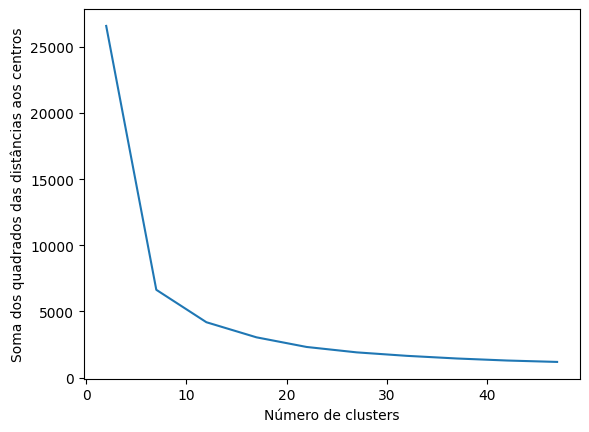

In [ ]:
# D)
plt.plot(parameter_interval, within_cluster_variation)
plt.xlabel("Número de clusters")
plt.ylabel("Soma dos quadrados das distâncias aos centros")

# Intuitivamente, tal distância trás uma noção de erro de clusterização. Quanto menor, melhor a clusterização pois os pontos estarão mais proximos do centro e portanto mais homogeneos (menor entropia intra-cluster).
# Assim, buscaria o numero de clusters que minimiza essa distância para obter a melhor clusterização possível. 
# Ou ainda, buscaria o ponto de inflexão da curva, onde a diminuição do erro não é mais significativa. Assim, tomariamos um numero de clusters que divide bem a imagem em regiões homogeneas mas não é muito flexível/complexo.
# No caso da imagem abaixo, o ponto de inflexão parece estar em torno de 12 clusters e o ponto de menor erro é o maximo valor em parameter_interval.

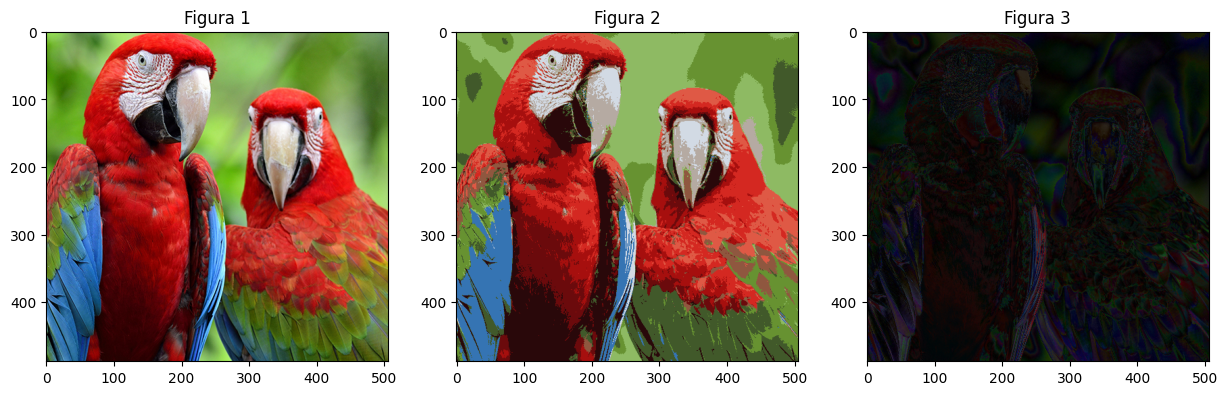

In [15]:
k = 12

output = function_1(imagem, k)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 15))

ax1.imshow(imagem)
ax1.set_title("Figura 1")

ax2.imshow(output)
ax2.set_title("Figura 2")

ax3.imshow(np.abs(imagem - output))
ax3.set_title("Figura 3")

plt.show()

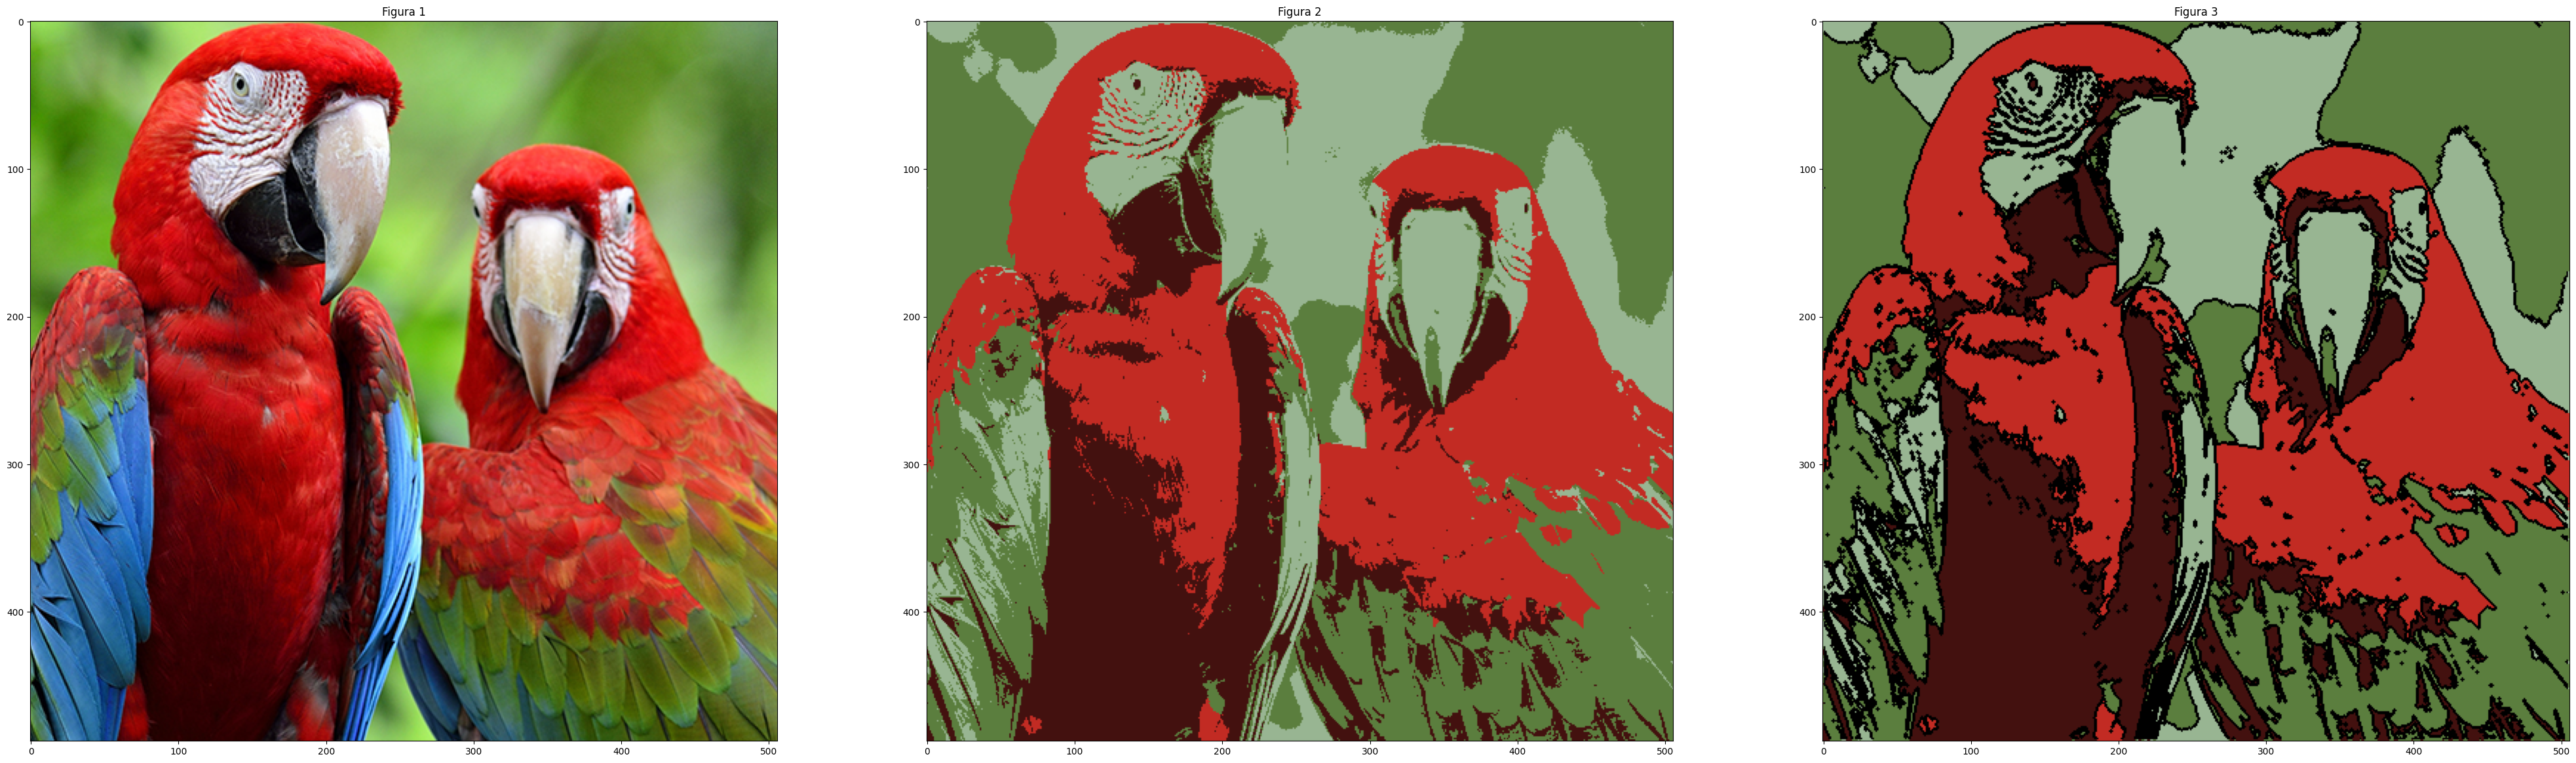

In [39]:
#E)

def function_3(img):
    res = img.copy()

    for i in range(1, img.shape[0] - 1):
        for j in range(1, img.shape[1] - 1):
            up = (img[i, j] != img[i + 1, j]).any()
            down = (img[i, j] != img[i - 1, j]).any()
            left = (img[i, j] != img[i, j - 1]).any()
            right = (img[i, j] != img[i, j + 1]).any()

            if up or down or left or right:
                res[i, j] = np.array([0, 0, 0])
    return res


imagem = mpimg.imread("araras.png")
output = function_1(imagem, 4)
edge = function_3(output)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(50, 50))

ax1.imshow(imagem)
ax1.set_title("Figura 1")

ax2.imshow(output)
ax2.set_title("Figura 2")

ax3.imshow(edge)
ax3.set_title("Figura 3")

plt.show()

100%|██████████| 9/9 [00:43<00:00,  4.85s/it]


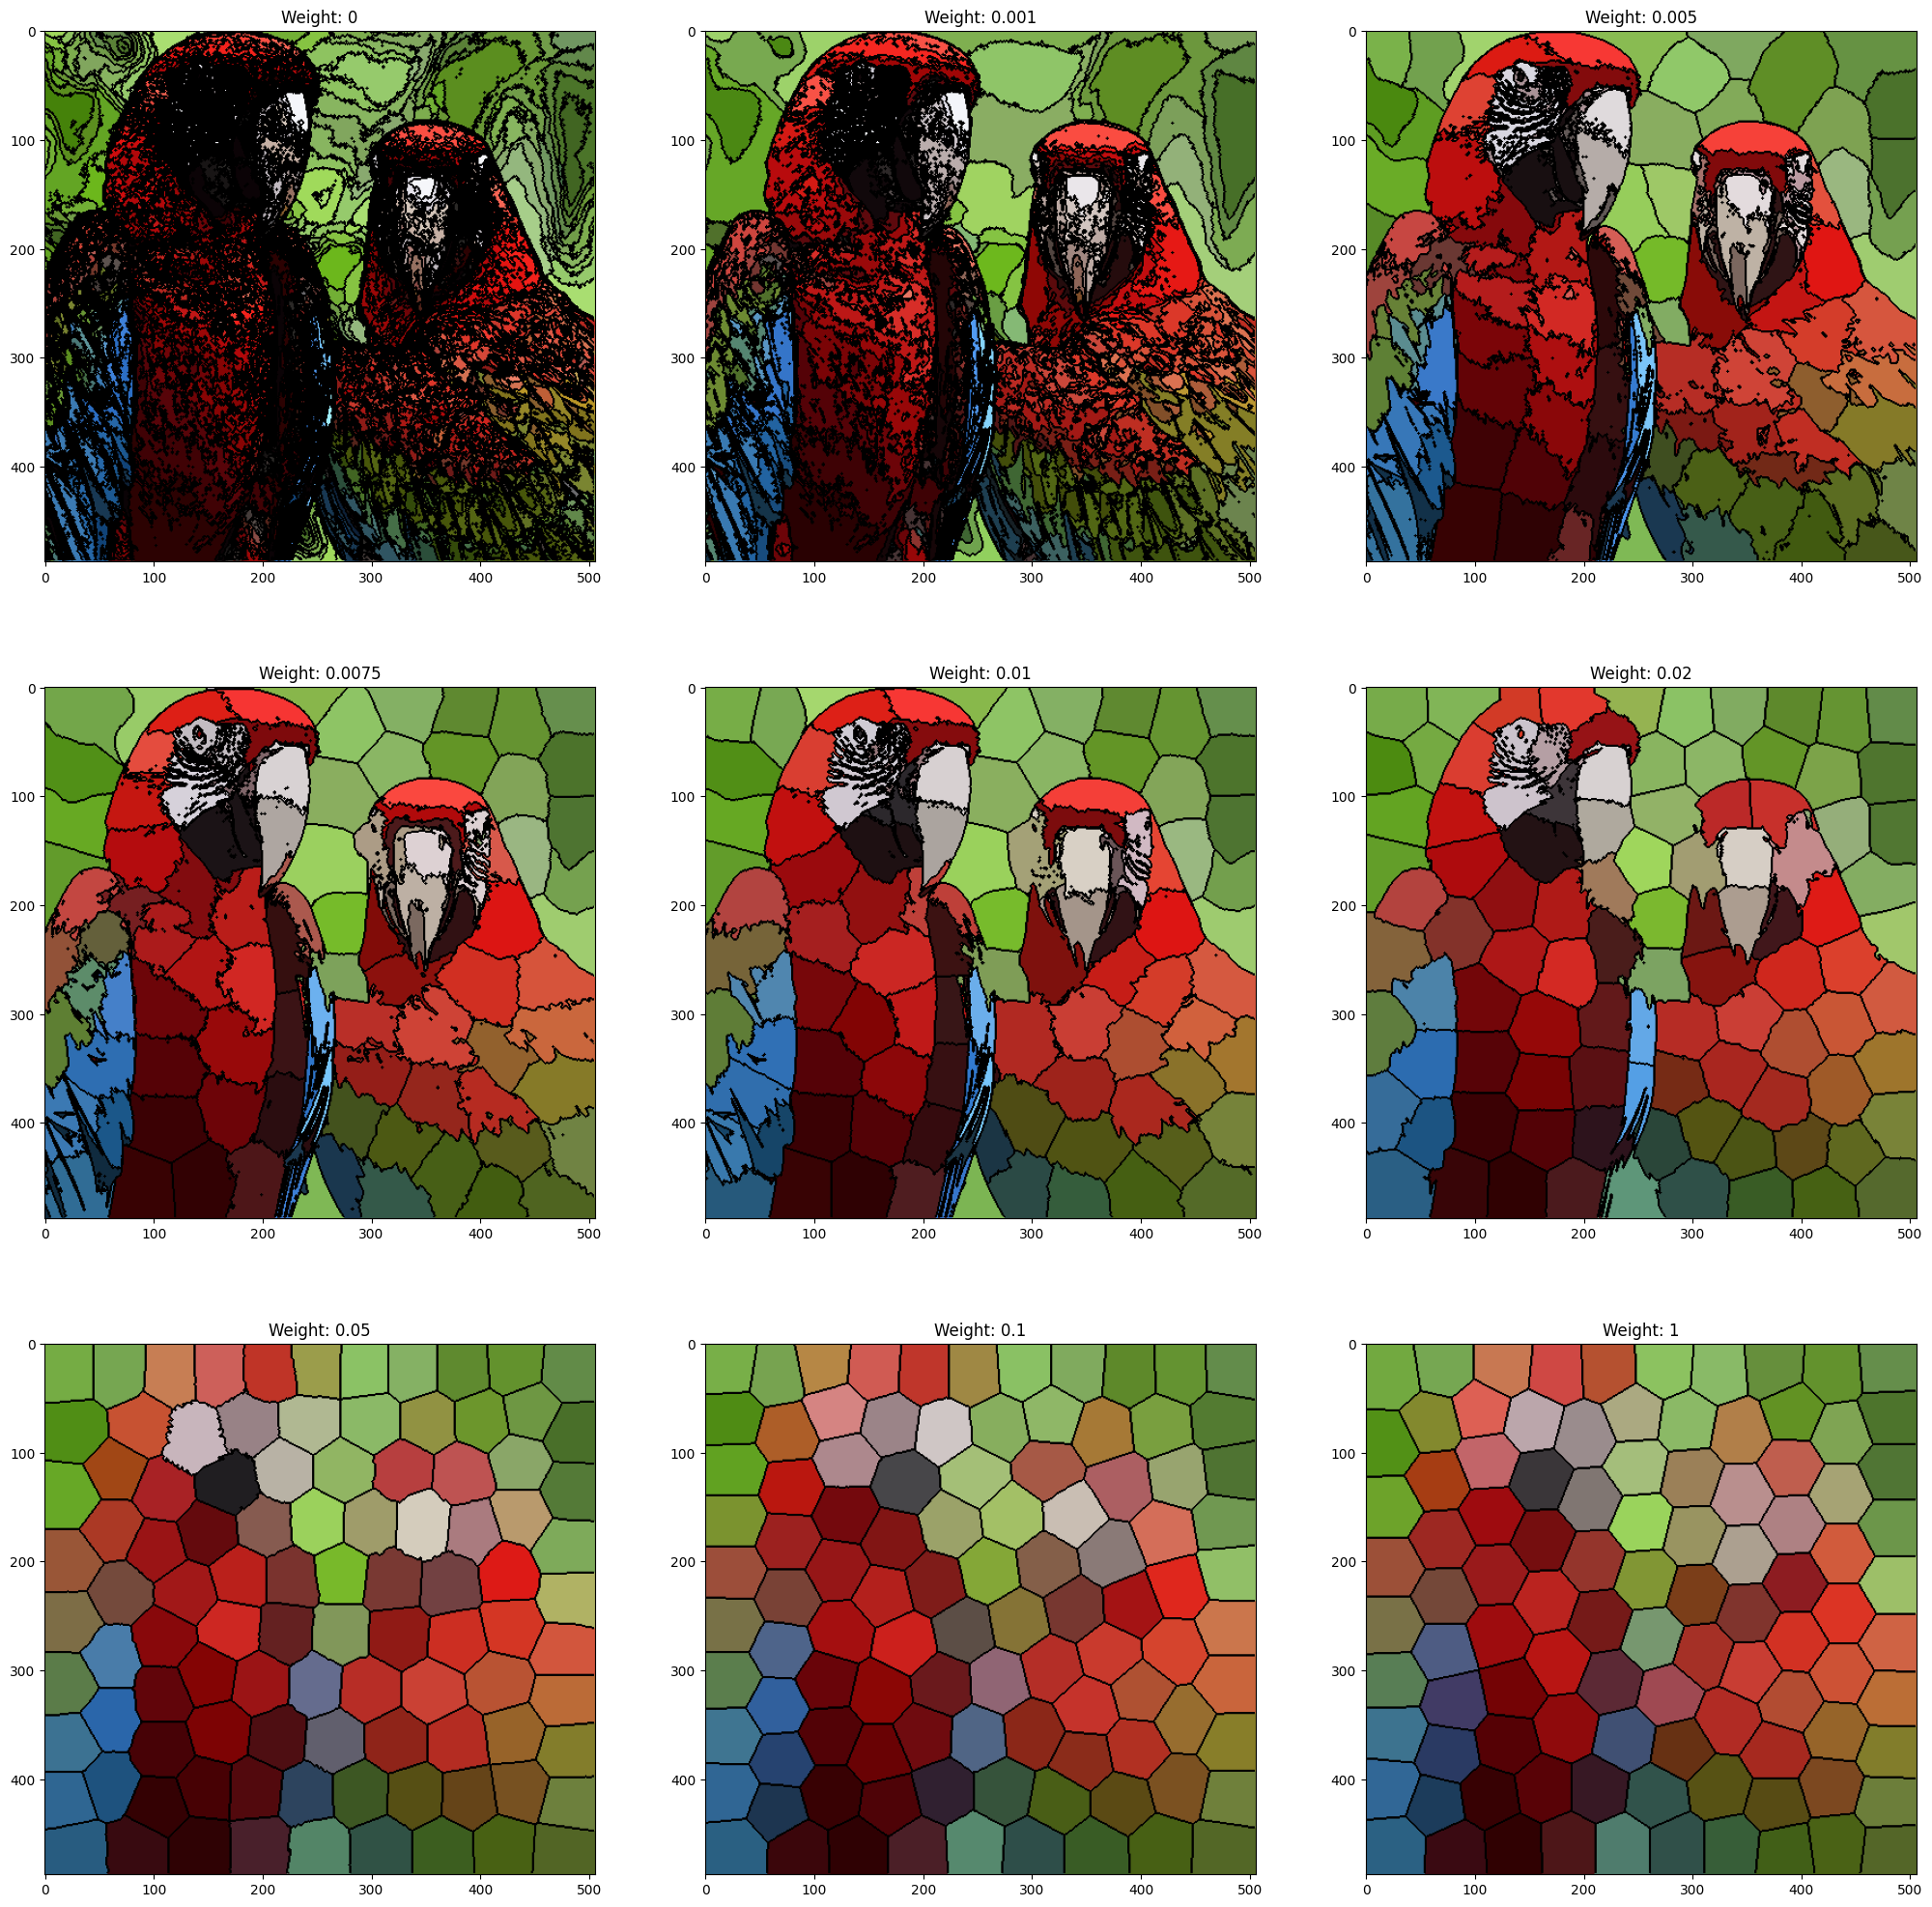

In [ ]:
# F)

def function_4(img, parameter, weight):
    tmp = img.copy()
    tmp = np.dstack((imagem, np.zeros((imagem.shape[0], imagem.shape[1]))))
    tmp = np.dstack((tmp, np.zeros((imagem.shape[0], imagem.shape[1]))))

    for i in range(tmp.shape[0]):
        for j in range(tmp.shape[1]):
            tmp[i, j, 3] = weight * i
            tmp[i, j, 4] = weight * j

    temp = np.reshape(tmp, (img.shape[0] * img.shape[1], 5))

    model = KMeans(n_clusters=parameter, random_state=0, n_init="auto").fit(temp)

    output = model.cluster_centers_[model.labels_]
    output = np.reshape(output, (img.shape[0], img.shape[1], 5))

    return output[:, :, :3]


imagem = mpimg.imread("araras.png")
k = 100
weights = [0, 0.001, 0.005, 0.0075, 0.01, 0.02, 0.05, 0.1, 1]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 25))

for i, axis in tqdm(enumerate(axes.flatten()), total=len(weights)):
    axis.imshow(function_3(function_4(imagem, k, weight=weights[i])))
    axis.set_title(f"Weight: {weights[i]}")

plt.show()

# O peso w é um fator que influência no impacto que a coordenada do pixel tem na clusterização.
# Quando maior w, maior é esse impacto. Assim, podemos ver que para w = 0, a clusterização é feita apenas com base nas cores dos pixels.

# Em contrapartirda, com o aumento do w vemos que os clusteres definem grãos na imagem.
# Quanto maior é w, mais similares (em termos de area) são os grãos. 
# Ou seja, podemos inferir que, quando w se aproxima de 1, as cores dos pixels tem pouco impacto na decisão de clusterização e a figura é homogeneamente dividida em regiões de acordo com a coordenada do pixel. 